# Python для анализа данных

*Ян Пиле, НИУ ВШЭ*

## Что такое анализ текстов и как с этим разобраться

In [1]:
!pip install -U textblob
!python -m textblob.download_corpora

Finished.

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\mbbur\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mbbur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mbbur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mbbur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\mbbur\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\mbbur\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [3]:
from textblob import TextBlob

## Исправление орфографии

Корректировка орфографии является одной из уникальных функций библиотеки TextBlob. С помощью соответствующего метода объекта TextBlob вы можете исправить все орфографические ошибки в вашем тексте. Пример:

In [4]:
text = "I lоve to watсhf footbal, but I have neter played it"
text_blob_object = TextBlob(text)

print(text_blob_object.correct())

I love to watch football, but I have never played it


## Анализ тональности

В этом разделе мы проанализируем мнение общественности о различных продуктах, купленных через Amazon. Для этого мы будем использовать анализатор тональности TextBlob.

Набор данных можно скачать по этой [ссылке](https://www.kaggle.com/sdxingaijing/topic-model-lda-algorithm/data) .

В качестве первого шага нам нужно импортировать набор данных. Мы импортируем только первые 20 000 - слишком уж большие данные. Вы можете импортировать больше записей, если хотите. Следующий скрипт импортирует набор данных:

In [5]:
import pandas as pd

reviews_datasets = pd.read_csv('Reviews.csv')
reviews_datasets = reviews_datasets.head(20000)

In [6]:
reviews_datasets.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."


Текстовый обзор о еде содержится в столбце «Text». Столбец Score содержит оценки пользователя для конкретного продукта, где 1 - самый низкий, а 5 - самый высокий рейтинг.

Давайте посмотрим распределение рейтинга:

C:\Users\mbbur\AppData\Local\Temp\ipykernel_7548\1355737807.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews_datasets['Score'])


<AxesSubplot:xlabel='Score', ylabel='Density'>

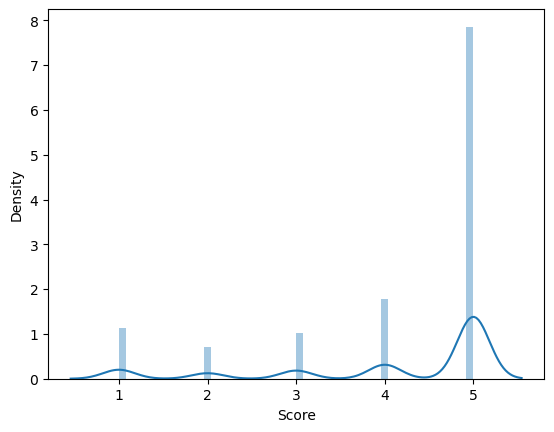

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(reviews_datasets['Score'])

Видно, что большинство рейтингов позитивные (==5). Давайте построим гистограмму для рейтингов, чтобы взглянуть на количество записей для каждого рейтинга.

<AxesSubplot:xlabel='Score', ylabel='count'>

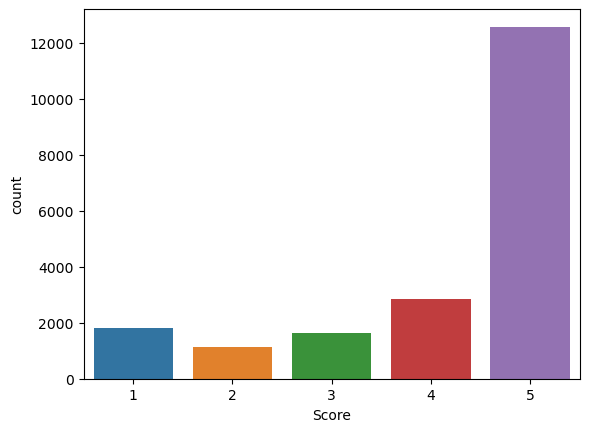

In [8]:
sns.countplot(x='Score', data=reviews_datasets)

Посмотрим глазами на произвольный отзыв

In [9]:
reviews_datasets[reviews_datasets.index==349]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
349,350,B00067AD4U,A2LYOWC3FC73XK,"Michael Ekstrum ""expresso bean fan""",1,1,5,1178928000,excellent - exactly what I expected,The product was exactly as advertised and fres...


Похоже, что отзыв положительный. Давайте проверим это с помощью библиотеки TextBlob. Чтобы найти тональность, мы должны использовать атрибут sentiment объекта TextBlob. Объект sentiment возвращает кортеж, который с тональностью и субъективностью отзыва.

Значение тональности может быть между -1 и 1, когда отзывы отрицательные, и тональность должна быть <0, когда же отзывы положительнеые, и тональность должна быть >0.

Значение субъективности может быть между 0 и 1. Субъективность количественно определяет долю личного мнения и фактической информации, содержащейся в тексте. Более высокая субъективность означает, что текст содержит личное мнение, а не фактическую информацию.

In [10]:
reviews_datasets['Text'][350]

'These chocolate covered espresso beans are wonderful!  The chocolate is very dark and rich and the "bean" inside is a very delightful blend of flavors with just enough caffine to really give it a zing.'

In [11]:
text_blob_object = TextBlob(reviews_datasets['Text'][350])
print(text_blob_object.sentiment)

Sentiment(polarity=0.39666666666666667, subjectivity=0.6616666666666667)


Отзыв положительный с высокой субъективностью.

Давайте добавим столбец тональности в наш набор данных.

In [12]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

reviews_datasets['Sentiment_Polarity'] = reviews_datasets['Text'].apply(find_polarity)
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


Посмотрим на распределение отзывов по полярности:

C:\Users\mbbur\AppData\Local\Temp\ipykernel_7548\3357713514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews_datasets['Sentiment_Polarity'])


<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

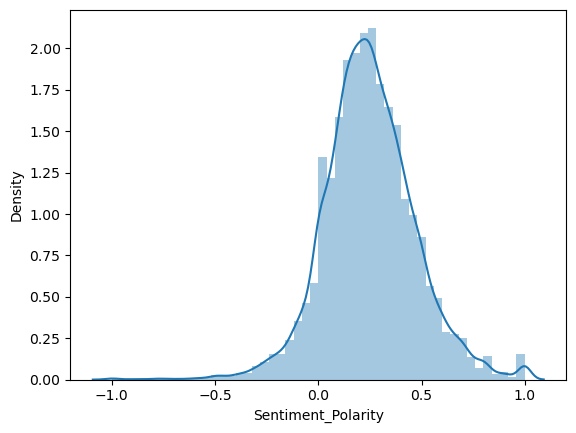

In [13]:
sns.distplot(reviews_datasets['Sentiment_Polarity'])

Из приведенного выше рисунка видно, что большинство отзывов являются положительными и имеют полярность от 0 до 0,5. Это естественно, так как большинство отзывов в наборе данных имеют 5-звездочные рейтинги.

Давайте построим среднюю полярность для каждого рейтинга.

<AxesSubplot:xlabel='Score', ylabel='Sentiment_Polarity'>

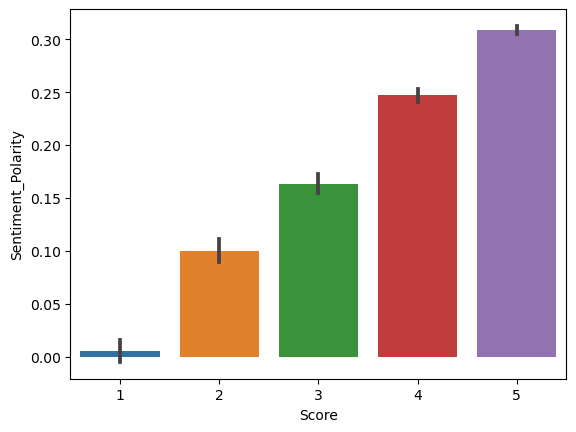

In [14]:
sns.barplot(x='Score', y='Sentiment_Polarity', data=reviews_datasets)

Результат показывает, что отзывы с высокими баллами имеют высокую положительную полярность.

Давайте теперь посмотрим на некоторые из самых негативных отзывов, то есть на отзывы с полярностью -1.

In [15]:
most_negative = reviews_datasets[reviews_datasets.Sentiment_Polarity == -1].Text.head()
print(most_negative)

545     These chips are nasty.  I thought someone had ...
1083    All my fault. I thought this would be a carton...
1832    Pop Chips are basically a horribly over-priced...
2087    I do not consider Gingerbread, Spicy Eggnog, C...
2763    This popcorn has alot of hulls I order 4 bags ...
Name: Text, dtype: object


In [16]:
reviews_datasets['Text'][545]

'These chips are nasty.  I thought someone had spilled a drink in the bag, no the chips were just soaked with grease.  Nasty!!'

Фу, читать противно.

Посмотрим лучше на что-то позитивное:

In [17]:
most_positive = reviews_datasets[reviews_datasets.Sentiment_Polarity == 1].Text.head()
print(most_positive)

106     not what I was expecting in terms of the compa...
223     This is an excellent tea.  One of the best I h...
338     I like a lot of sesame oil and use it in salad...
796     My mother and father were the recipient of the...
1031    The Kelloggs Muselix are delicious and the del...
Name: Text, dtype: object


Пункт 106 немного настораживает. Посмотрим на него внимательно:

In [18]:
reviews_datasets['Text'][106]

"not what I was expecting in terms of the company's reputation for excellent home delivery products"

Отзыв не слишком уж положительный, но ему была назначена полярность 1 из-за присутствия таких слов, как «excellent» и «reputation». Важно знать, что анализатор настроений не на 100% защищен от ошибок и в некоторых случаях может предсказать неверную тональность. Но и правильно предсказывать он тоже умеет :)

In [19]:
reviews_datasets['Text'][223]

'This is an excellent tea.  One of the best I have ever had.  It is especially great when you prepare it with a samovar.'

В действительности вышеизложенный Sentiment-analysis, зашитый в TextBlob, это предобученный Наивный Байесовский Классификатор (звучит сложновато и немного уничижительно, но это не страшно). Ниже ссылки-доказательства моего утверждения :) 

[Proof link StackOverflow](https://stackoverflow.com/questions/43871019/polarity-calculation-in-sentiment-analysis-using-textblob)

[Ссылка на код в TextBlob](https://github.com/sloria/TextBlob/blob/90cc87ab0f9e25f37379079840ec43aba59af440/textblob/en/sentiments.py)

[Ссылка на код в NLTK](http://www.nltk.org/_modules/nltk/classify/naivebayes.html)

Давайте разберем, что это за алгоритм такой и как он здесь используется. 

**Ссылки:**

[Условная вероятность](https://ru.wikipedia.org/wiki/Условная_вероятность#Предельная_вероятность_равна_условной_вероятности)
[Теорема Байеса](https://ru.wikipedia.org/wiki/Теорема_Байеса)
[Наивный Байесовский Классификатор](https://logic.pdmi.ras.ru/~sergey/teaching/mlstc12/sem01-naivebayes.pdf)

А еще можно читать [тут](https://logic.pdmi.ras.ru/~sergey/teaching/mlstc12/sem01-naivebayes.pdf)
и [тут](https://towardsdatascience.com/naive-bayes-explained-9d2b96f4a9c0)

Коротко о том, что тут происходит. Наивный Байесовский классификатор помогает посчитать вероятность того, что конкретное слово окажется в положительном/отрицательном отзыве. Эта вероятность от нуля до единицы. Можно перевести ее в некую величину  от -1 до 1 (простенькое отображение) и назовем эту величину полярностью/тональностью слова - тональность 1 => вероятность найти такое слово в положительном отзыве велика, тональность = -1 => вероятность найти слово в положительном отзыве крайне мала. Теперь для каждого слова из словаря у нас есть готовая вероятность. 

После этого делается следующее:

Смотрим на новый отзыв, разбиваем его на слова. Слова могут быть:
* Известными(с известной полярностью)
* Неизвестными(если слова нет в словаре, TextBlob считает, что его вообще нет) или несущественными(TextBlob не ьерет в расчет слова типа артиклей и тд)
* Словами-модификаторами (not, very и тд)

Тональность отзыва считается так:
1. Отбрасываем все неизвестные и несущественные слова
2. Берем слова-модификаторы(их действие распространяется только на слово, идущее за ними) и с их помощью как-то меняем полярность следующего слова
3. Считаем для каждого слова-не-модификатора результирующую полярность
4. Усредняем полученную полярность для всех слов-не модификаторов. Эта усредненная оценка и будет полярностью отзыва.
5. Готово, вы восхитительны

Давайте разберем на примере

In [20]:
from textblob import TextBlob

TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

[Здесь](https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml) можно посмотреть слова, по которым он это делает.

In [21]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [22]:
TextBlob("isn't good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Так, добавление not умножает полярность на -0.5

In [23]:
TextBlob("very good").sentiment.polarity

0.9099999999999999

А еще у некоторых слов есть свойство intensity. только что наша полярность умножилась именно на нее

In [24]:
TextBlob("not very great").sentiment

Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

Артикли и вспомогательные слова TextBlob игнорирует. А вот модификация здесь произошла хитрым образом:
    
* **polarity** = **-0.5**(not)***1/1.3**(very)***0.8**(great)
* **subjectivity** = **1/1.3**(very)***0.75**(great)

In [25]:
TextBlob("very")

TextBlob("very")

А вот этого слова нет в словаре. И поэтому ничего не происходит)

In [26]:
TextBlob("abominable").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [27]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Как видите, все усреднилось:

In [28]:
TextBlob("great good").sentiment

Sentiment(polarity=0.75, subjectivity=0.675)